## Using Keras to Build and Train Neural Networks

In this exercise we will use a neural network to predict diabetes using the Pima Diabetes Dataset. We will use a Random Forest for training the model and to get the results.

In [1]:
% pylab inline
import pandas as pd
import seaborn
from sklearn import model_selection
seaborn.set_style("whitegrid")

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

from __future__ import absolute_import, division, print_function  # Python 2/3 compatibility


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
train1=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data")
train1.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [3]:
num_cols = [c for c in train1.columns if train1[c].dtype in ['int64', 'float64']]
train1 = train1[num_cols].copy()
train1.dropna(inplace=True)

In [4]:
train1.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,19.19,28700.0,33.88,0.0,1.0,50.0,...,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0,30800.0,0
26,17563299,7200,7200,7150.0,12.99,37000.0,13.43,0.0,0.0,73.0,...,0.0,0.0,0.0,0.0,47.0,0.0,0.0,8589.0,19800.0,1
52,52145013,20000,20000,20000.0,12.69,160000.0,4.10,1.0,2.0,4.0,...,0.0,0.0,0.0,0.0,66.0,0.0,805.0,234697.0,43300.0,0
72,72268079,7200,7200,7200.0,14.48,39750.0,19.66,0.0,3.0,26.0,...,0.0,0.0,0.0,0.0,26.0,0.0,0.0,58396.0,3000.0,0
80,57896812,5000,5000,5000.0,12.69,77000.0,14.50,2.0,4.0,18.0,...,0.0,0.0,0.0,0.0,89.0,0.0,0.0,174517.0,15550.0,0


In [5]:
y = train1['loan_status']
x = train1.drop(columns=['member_id', 'loan_status'])
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y)

 To get a baseline we will start by training the model with 200 trees.

In [6]:
## Train the RF Model
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
# Make predictions on the test set
y_pred_class_rf = rf_model.predict(x_test)
y_pred_prob_rf = rf_model.predict_proba(x_test)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.840
roc-auc is 0.672


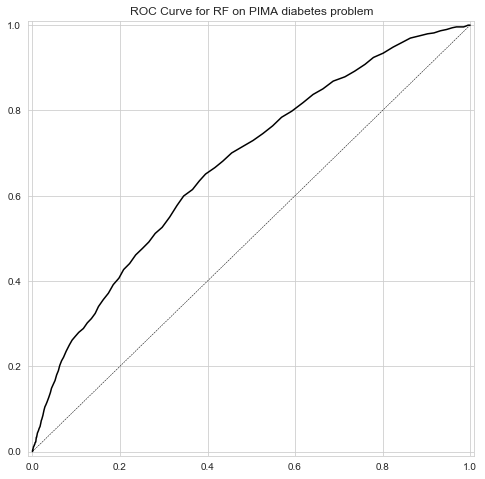

In [8]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')

In [9]:
normalizer = StandardScaler()
x_train_norm = normalizer.fit_transform(x_train)
x_test_norm = normalizer.transform(x_test)

#Defining the model
model_1 = Sequential([
    Dense(12, input_shape=(25,), activation="relu"),
    Dense(1, activation="sigmoid")
])
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [10]:
#Fitting the model

model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=200)

Train on 18564 samples, validate on 6189 samples
Epoch 1/200
18564/18564 [==============================] - 2s 92us/step - loss: 0.5401 - acc: 0.8067 - val_loss: 0.4970 - val_acc: 0.8339
Epoch 2/200
18564/18564 [==============================] - 1s 57us/step - loss: 0.4829 - acc: 0.8333 - val_loss: 0.4689 - val_acc: 0.8375
Epoch 3/200
18564/18564 [==============================] - 1s 56us/step - loss: 0.4643 - acc: 0.8359 - val_loss: 0.4550 - val_acc: 0.8389
Epoch 4/200
18564/18564 [==============================] - 1s 58us/step - loss: 0.4540 - acc: 0.8368 - val_loss: 0.4465 - val_acc: 0.8391
Epoch 5/200
18564/18564 [==============================] - 1s 57us/step - loss: 0.4474 - acc: 0.8370 - val_loss: 0.4407 - val_acc: 0.8396
Epoch 6/200
18564/18564 [==============================] - 1s 57us/step - loss: 0.4429 - acc: 0.8372 - val_loss: 0.4367 - val_acc: 0.8396
Epoch 7/200
18564/18564 [==============================] - 1s 57us/step - loss: 0.4396 - acc: 0.8371 - val_loss: 0.4337 - v

Epoch 118/200
18564/18564 [==============================] - 1s 63us/step - loss: 0.4123 - acc: 0.8371 - val_loss: 0.4090 - val_acc: 0.8400
Epoch 119/200
18564/18564 [==============================] - 1s 58us/step - loss: 0.4123 - acc: 0.8372 - val_loss: 0.4090 - val_acc: 0.8400
Epoch 120/200
18564/18564 [==============================] - 1s 63us/step - loss: 0.4122 - acc: 0.8372 - val_loss: 0.4090 - val_acc: 0.8400
Epoch 121/200
18564/18564 [==============================] - 1s 66us/step - loss: 0.4122 - acc: 0.8372 - val_loss: 0.4089 - val_acc: 0.8400
Epoch 122/200
18564/18564 [==============================] - 1s 64us/step - loss: 0.4122 - acc: 0.8372 - val_loss: 0.4089 - val_acc: 0.8400
Epoch 123/200
18564/18564 [==============================] - 1s 65us/step - loss: 0.4121 - acc: 0.8371 - val_loss: 0.4089 - val_acc: 0.8399
Epoch 124/200
18564/18564 [==============================] - 1s 63us/step - loss: 0.4121 - acc: 0.8372 - val_loss: 0.4089 - val_acc: 0.8400
Epoch 125/200
18564/

In [11]:
y_pred_class_nn_1 = model_1.predict_classes(x_test_norm)
y_pred_prob_nn_1 = model_1.predict(x_test_norm)
y_pred_class_nn_1[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [12]:
y_pred_prob_nn_1[:10]

array([[0.28942138],
       [0.14433211],
       [0.27857614],
       [0.17264558],
       [0.07057187],
       [0.20818083],
       [0.11926517],
       [0.07827672],
       [0.17417721],
       [0.13929859]], dtype=float32)

accuracy is 0.839
roc-auc is 0.694


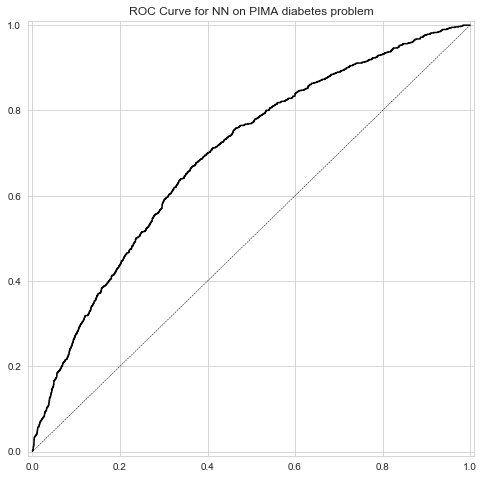

In [13]:
#Plot roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

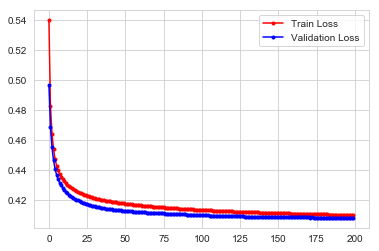

In [14]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [15]:
run_hist_1b = model_1.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=500)

Train on 18564 samples, validate on 6189 samples
Epoch 1/500
18564/18564 [==============================] - 1s 62us/step - loss: 0.4098 - acc: 0.8371 - val_loss: 0.4079 - val_acc: 0.8391
Epoch 2/500
18564/18564 [==============================] - 1s 58us/step - loss: 0.4098 - acc: 0.8371 - val_loss: 0.4078 - val_acc: 0.8394
Epoch 3/500
18564/18564 [==============================] - 1s 59us/step - loss: 0.4098 - acc: 0.8372 - val_loss: 0.4078 - val_acc: 0.8394
Epoch 4/500
18564/18564 [==============================] - 1s 56us/step - loss: 0.4098 - acc: 0.8371 - val_loss: 0.4078 - val_acc: 0.8394
Epoch 5/500
18564/18564 [==============================] - 1s 58us/step - loss: 0.4097 - acc: 0.8371 - val_loss: 0.4079 - val_acc: 0.8391
Epoch 6/500
18564/18564 [==============================] - 1s 62us/step - loss: 0.4097 - acc: 0.8372 - val_loss: 0.4079 - val_acc: 0.8391
Epoch 7/500
18564/18564 [==============================] - 1s 58us/step - loss: 0.4097 - acc: 0.8371 - val_loss: 0.4079 - v

Epoch 118/500
18564/18564 [==============================] - 1s 57us/step - loss: 0.4081 - acc: 0.8373 - val_loss: 0.4076 - val_acc: 0.8394
Epoch 119/500
18564/18564 [==============================] - 1s 57us/step - loss: 0.4080 - acc: 0.8372 - val_loss: 0.4076 - val_acc: 0.8394
Epoch 120/500
18564/18564 [==============================] - 1s 56us/step - loss: 0.4080 - acc: 0.8372 - val_loss: 0.4076 - val_acc: 0.8394
Epoch 121/500
18564/18564 [==============================] - 1s 57us/step - loss: 0.4080 - acc: 0.8372 - val_loss: 0.4075 - val_acc: 0.8394
Epoch 122/500
18564/18564 [==============================] - 1s 57us/step - loss: 0.4080 - acc: 0.8371 - val_loss: 0.4076 - val_acc: 0.8394
Epoch 123/500
18564/18564 [==============================] - 1s 57us/step - loss: 0.4080 - acc: 0.8372 - val_loss: 0.4076 - val_acc: 0.8394
Epoch 124/500
18564/18564 [==============================] - 1s 57us/step - loss: 0.4080 - acc: 0.8371 - val_loss: 0.4076 - val_acc: 0.8394
Epoch 125/500
18564/

18564/18564 [==============================] - 1s 57us/step - loss: 0.4067 - acc: 0.8375 - val_loss: 0.4076 - val_acc: 0.8389
Epoch 235/500
18564/18564 [==============================] - 1s 59us/step - loss: 0.4066 - acc: 0.8376 - val_loss: 0.4076 - val_acc: 0.8389
Epoch 236/500
18564/18564 [==============================] - 1s 56us/step - loss: 0.4066 - acc: 0.8376 - val_loss: 0.4076 - val_acc: 0.8389
Epoch 237/500
18564/18564 [==============================] - 1s 59us/step - loss: 0.4066 - acc: 0.8375 - val_loss: 0.4075 - val_acc: 0.8389
Epoch 238/500
18564/18564 [==============================] - 1s 59us/step - loss: 0.4066 - acc: 0.8375 - val_loss: 0.4075 - val_acc: 0.8387
Epoch 239/500
18564/18564 [==============================] - 1s 62us/step - loss: 0.4066 - acc: 0.8375 - val_loss: 0.4076 - val_acc: 0.8387
Epoch 240/500
18564/18564 [==============================] - 1s 58us/step - loss: 0.4066 - acc: 0.8375 - val_loss: 0.4076 - val_acc: 0.8387
Epoch 241/500
18564/18564 [=======

18564/18564 [==============================] - 1s 57us/step - loss: 0.4061 - acc: 0.8377 - val_loss: 0.4075 - val_acc: 0.8392
Epoch 293/500
18564/18564 [==============================] - 1s 60us/step - loss: 0.4061 - acc: 0.8376 - val_loss: 0.4075 - val_acc: 0.8392
Epoch 294/500
18564/18564 [==============================] - 1s 59us/step - loss: 0.4061 - acc: 0.8375 - val_loss: 0.4075 - val_acc: 0.8394
Epoch 295/500
18564/18564 [==============================] - 1s 58us/step - loss: 0.4061 - acc: 0.8377 - val_loss: 0.4075 - val_acc: 0.8392
Epoch 296/500
18564/18564 [==============================] - 1s 57us/step - loss: 0.4061 - acc: 0.8375 - val_loss: 0.4075 - val_acc: 0.8394
Epoch 297/500
18564/18564 [==============================] - 1s 58us/step - loss: 0.4061 - acc: 0.8376 - val_loss: 0.4075 - val_acc: 0.8392
Epoch 298/500
18564/18564 [==============================] - 1s 58us/step - loss: 0.4061 - acc: 0.8376 - val_loss: 0.4075 - val_acc: 0.8394
Epoch 299/500
18564/18564 [=======

18564/18564 [==============================] - 1s 65us/step - loss: 0.4054 - acc: 0.8378 - val_loss: 0.4075 - val_acc: 0.8400
Epoch 409/500
18564/18564 [==============================] - 1s 57us/step - loss: 0.4054 - acc: 0.8380 - val_loss: 0.4075 - val_acc: 0.8396
Epoch 410/500
18564/18564 [==============================] - 1s 58us/step - loss: 0.4054 - acc: 0.8378 - val_loss: 0.4075 - val_acc: 0.8396
Epoch 411/500
18564/18564 [==============================] - 1s 58us/step - loss: 0.4054 - acc: 0.8377 - val_loss: 0.4075 - val_acc: 0.8397
Epoch 412/500
18564/18564 [==============================] - 1s 65us/step - loss: 0.4054 - acc: 0.8379 - val_loss: 0.4075 - val_acc: 0.8397
Epoch 413/500
18564/18564 [==============================] - 1s 62us/step - loss: 0.4054 - acc: 0.8377 - val_loss: 0.4075 - val_acc: 0.8394
Epoch 414/500
18564/18564 [==============================] - 1s 61us/step - loss: 0.4054 - acc: 0.8378 - val_loss: 0.4075 - val_acc: 0.8397
Epoch 415/500
18564/18564 [=======

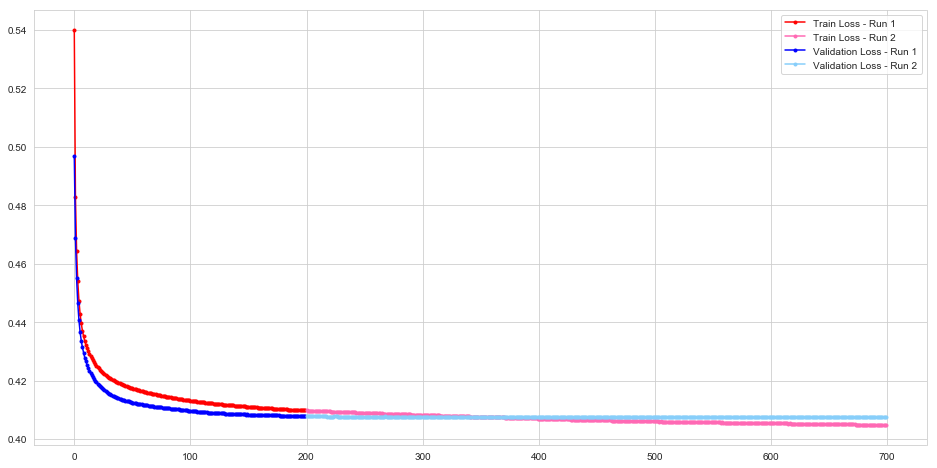

In [16]:
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax.legend()